In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [78]:
#import scipy
import torch

In [79]:
x = np.linspace(0, 4 * (np.pi **2), num = 101)
print(np.shape(x))
empty = np.zeros_like(x)
for i in range(1,10):
    empty+= (1/i)*(np.cos((x*i)/(2*np.pi))) + (1/(i**2))*(np.sin((x*i)/(2*np.pi)))
values = empty
print(values[:5])

(101,)
[2.82896825 2.91735193 2.83518708 2.61566781 2.3125571 ]


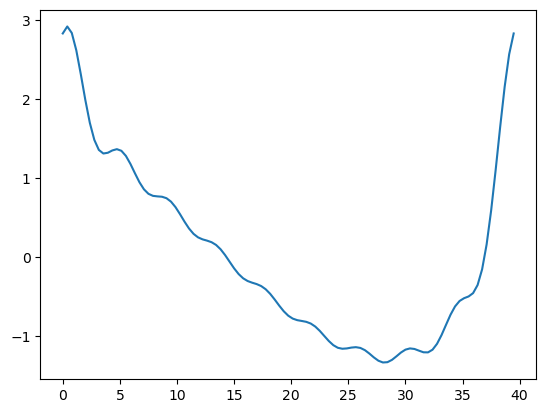

In [80]:
plt.plot(x, values)

In [81]:
def DFT(xs):
    """
    Function to calculate the 
    discrete Fourier Transform 
    of a 1D real-valued signal x
    """

    N = len(xs)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    
    X = np.dot(e, xs)
    
    return X

In [82]:
t = torch.tensor(x)
transform = torch.fft.fft(t)
print(transform[:5]/71)
print(abs(transform[:5])/71)
print(abs(transform[:5]/71))

tensor([28.0797+0.0000j, -0.2808+9.0245j, -0.2808+4.5079j, -0.2808+3.0004j,
        -0.2808+2.2452j], dtype=torch.complex128)
tensor([28.0797,  9.0289,  4.5166,  3.0135,  2.2627], dtype=torch.float64)
tensor([28.0797,  9.0289,  4.5166,  3.0135,  2.2627], dtype=torch.float64)


In [84]:
print(abs(torch.fft.fft(torch.tensor(values))[:10]))

tensor([ 2.8290, 73.0561, 29.3702, 18.5834, 13.5712, 10.5869,  8.5479,  7.0103,
         5.7308,  4.4594], dtype=torch.float64)


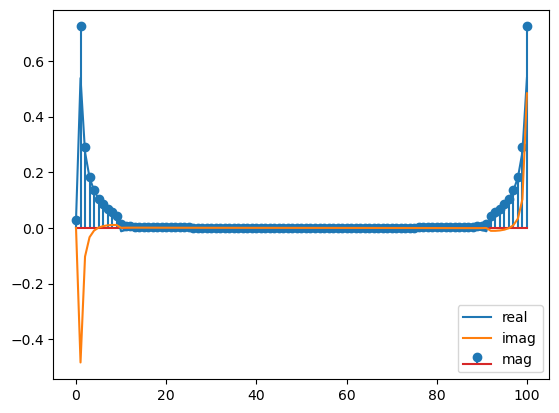

In [103]:
plt.stem(abs(torch.fft.fft(torch.tensor(values)))/len(abs(torch.fft.fft(torch.tensor(values)))), label = 'mag')
plt.plot(torch.real(torch.fft.fft(torch.tensor(values)))/len(abs(torch.fft.fft(torch.tensor(values)))), label = 'real')
plt.plot(torch.imag(torch.fft.fft(torch.tensor(values)))/len(abs(torch.fft.fft(torch.tensor(values)))), label = 'imag')
plt.legend()

In [90]:
from scipy import fft as scift
print(abs(scift.fft(values)))

[ 2.82896825 73.05608065 29.37019514 18.58340787 13.57120938 10.58693106
  8.54792499  7.01029812  5.73084926  4.459401    1.23564152  0.76468372
  0.57013846  0.45792782  0.38378687  0.33092239  0.29130782  0.26055106
  0.23602321  0.2160464   0.19949653  0.18559131  0.1737693   0.16361719
  0.15482411  0.14715188  0.1404151   0.13446744  0.12919194  0.12449413
  0.12029692  0.11653689  0.11316145  0.11012668  0.10739569  0.10493734
  0.1027252   0.10073677  0.09895285  0.09735699  0.09593514  0.09467525
  0.09356702  0.09260171  0.09177191  0.09107141  0.09049509  0.09003881
  0.08969935  0.08947433  0.08936221  0.08936221  0.08947433  0.08969935
  0.09003881  0.09049509  0.09107141  0.09177191  0.09260171  0.09356702
  0.09467525  0.09593514  0.09735699  0.09895285  0.10073677  0.1027252
  0.10493734  0.10739569  0.11012668  0.11316145  0.11653689  0.12029692
  0.12449413  0.12919194  0.13446744  0.1404151   0.14715188  0.15482411
  0.16361719  0.1737693   0.18559131  0.19949653  0.

<StemContainer object of 3 artists>

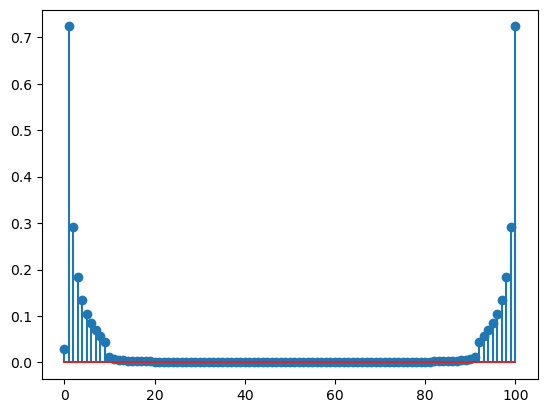

In [92]:
plt.stem(abs(scift.fft(values).reshape(-1))/101)

[ 2.82896825 73.05608065 29.37019514 18.58340787 13.57120938]


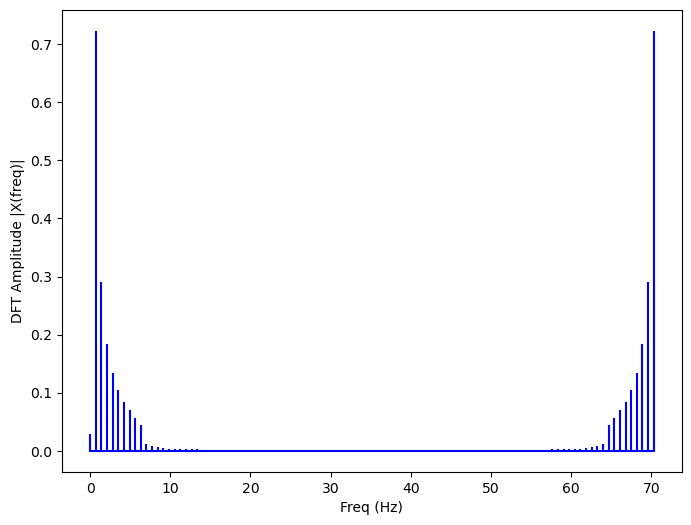

In [93]:
X = DFT(values)
# calculate the frequency
print(abs(X[:5]))

N = len(X)
n = np.arange(N)
T = N/71
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X)/101, 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

39.47841760435743
(101,)
[2.82896825 2.91735193 2.83518708 2.61566781 2.3125571 ]


<StemContainer object of 3 artists>

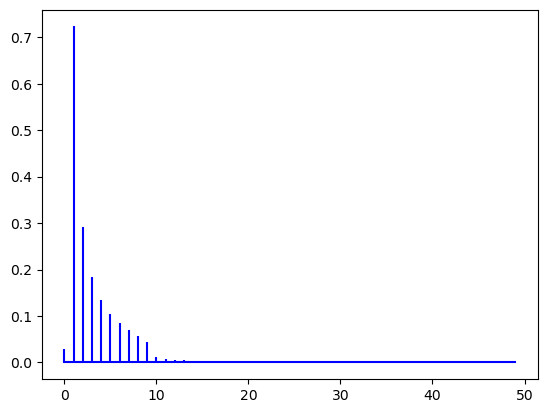

In [96]:
newx = np.linspace(0, (2*np.pi)**2, num = 101)
print(newx[-1])
print(np.shape(newx))
new_empty = np.zeros_like(newx)
for i in range(1,10):
    new_empty+= (1/i)*(np.cos((newx*i)/(2*np.pi)))+ (1/(i**2))*(np.sin((newx*i)/(2*np.pi)))
new_values = new_empty
newX = DFT(new_values)
print(values[:5])
plt.stem(abs(newX[:len(abs(newX))//2])/101, 'b', \
         markerfmt=" ", basefmt="-b")